In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
sns.set_style("whitegrid")

In [3]:
# retrieving DataFrames pickled for the stock market indexes and the daily new cases of covid-19 by country
df_stockmarket_indexes = pd.read_pickle("/Users/jsialell/Data_Thief_Project_Team_Wall-e/data/final_financial_data_interpolated_abs_perc")
df_covid_19_daily = pd.read_pickle("/Users/jsialell/Data_Thief_Project_Team_Wall-e/data/covid_cases_daily.pkl")

In [4]:
df_stockmarket_indexes.head()

date    CAC_40_FR     DAX_30_GR  DOW_JONES_US       FTSE_IT  \
371 2020-01-07  6012.350000  13226.830000      28583.68  23723.380000   
372 2020-01-08  6031.000000  13320.180000      28745.09  23832.020000   
373 2020-01-09  6042.550000  13495.060000      28956.90  24016.700000   
374 2020-01-10  6037.110000  13483.310000      28823.77  24021.400000   
375 2020-01-11  6036.786667  13472.713333      28851.53  23979.796667   

     IBEX_SP  NIKKEI_JP   S&P_500_US       SSE_CN  CAC_40_FR_x  DAX_30_GR_x  \
371   9579.8   23575.72  3237.180000  3104.802002     1.000000     1.000000   
372   9591.4   23204.76  3253.050000  3066.893066     1.003102     1.007058   
373   9581.8   23739.87  3274.700000  3094.882080     1.005023     1.020279   
374   9573.6   23850.57  3265.350000  3092.291016     1.004118     1.019391   
375   9563.7   23894.22  3272.943333  3100.050700     1.004064     1.018590   

     DOW_JONES_US_x  FTSE_IT_x  IBEX_SP_x  NIKKEI_JP_x  S&P_500_US_x  SSE_CN_x  
371        1.000000   1.000000   1.000000     1.000000      1.000000  1.000000  
372        1.005647   1.004579   1.001211     0.984265      1.004902  0.987790  
373        1.013057   1.012364   1.000209     1.006963      1.011590  0.996805  
374        1.008400   1.012562   0.999353     1.011658      1.008702  0.995970  
375        1.009371   1.010809   0.998319     1.013510      1.011048  0.998470

In [5]:
df_stockmarket_indexes.shape

(93, 17)

In [6]:
df_covid_19_daily.head()

date  China  France  Germany  Italy  Japan  Spain  US
0 2020-01-22    548       0        0      0      2      0   1
1 2020-01-23     95       0        0      0      0      0   0
2 2020-01-24    277       2        0      0      0      0   1
3 2020-01-25    486       1        0      0      0      0   0
4 2020-01-26    669       0        0      0      2      0   3

In [33]:
df_covid_19_daily.shape

(77, 8)

In [7]:
# Since the DataFrame for new covid-19 cases contains information on fewer dates than the one for stock market indexes, a left-merging on the latter.
df_stock_market_covid_19 = df_stockmarket_indexes.merge(right=df_covid_19_daily,
                                                       how="left",
                                                       on="date")

In [8]:
df_stock_market_covid_19.head()

date    CAC_40_FR     DAX_30_GR  DOW_JONES_US       FTSE_IT  IBEX_SP  \
0 2020-01-07  6012.350000  13226.830000      28583.68  23723.380000   9579.8   
1 2020-01-08  6031.000000  13320.180000      28745.09  23832.020000   9591.4   
2 2020-01-09  6042.550000  13495.060000      28956.90  24016.700000   9581.8   
3 2020-01-10  6037.110000  13483.310000      28823.77  24021.400000   9573.6   
4 2020-01-11  6036.786667  13472.713333      28851.53  23979.796667   9563.7   

   NIKKEI_JP   S&P_500_US       SSE_CN  CAC_40_FR_x  ...  NIKKEI_JP_x  \
0   23575.72  3237.180000  3104.802002     1.000000  ...     1.000000   
1   23204.76  3253.050000  3066.893066     1.003102  ...     0.984265   
2   23739.87  3274.700000  3094.882080     1.005023  ...     1.006963   
3   23850.57  3265.350000  3092.291016     1.004118  ...     1.011658   
4   23894.22  3272.943333  3100.050700     1.004064  ...     1.013510   

   S&P_500_US_x  SSE_CN_x  China  France  Germany  Italy  Japan  Spain  US  
0      1.000000  1.000000    NaN     NaN      NaN    NaN    NaN    NaN NaN  
1      1.004902  0.987790    NaN     NaN      NaN    NaN    NaN    NaN NaN  
2      1.011590  0.996805    NaN     NaN      NaN    NaN    NaN    NaN NaN  
3      1.008702  0.995970    NaN     NaN      NaN    NaN    NaN    NaN NaN  
4      1.011048  0.998470    NaN     NaN      NaN    NaN    NaN    NaN NaN  

[5 rows x 24 columns]

In [9]:
# The merged DataFrame is pickled:
# df_stock_market_covid_19.to_pickle("/Users/jsialell/Data_Thief_Project_Team_Wall-e/data/Stock_Market_Index_Covid-19_daily.pkl")

In [14]:
# Dropping unrelevant columns, renaming and reorganising relevant columns for consistency purposes.
df = df_stock_market_covid_19.drop(columns=['SSE_CN', 'CAC_40_FR', 'DAX_30_GR', 'DOW_JONES_US', 'FTSE_IT', 'IBEX_SP','NIKKEI_JP', 'S&P_500_US', 'S&P_500_US_x'])
df = df.rename(columns={"CAC_40_FR_x":"CAC 40 normalized (FR)",
                        "DAX_30_GR_x":"DAX 30 normalized (DE)",
                        "DOW_JONES_US_x":"DOW JONES normalized (US)",
                        "FTSE_IT_x":"FTSE normalized (IT)",
                        "IBEX_SP_x":"IBEX 35 normalized (SP)",
                        "NIKKEI_JP_x":"NIKKEI normalized (JP)",
                        "SSE_CN_x": "SSE normalized (CN)",
                        "China":"Covid-19 cases (CN)",
                        "France":"Covid-19 cases (FR)",
                        "Germany":"Covid-19 cases (DE)",
                        "Italy":"Covid-19 cases (IT)",
                        "US":"Covid-19 cases (US)",
                        "Japan":"Covid-19 cases (JP)",
                        "Spain":"Covid-19 cases (SP)"})

df = df[["date",
         "CAC 40 normalized (FR)",
         "DAX 30 normalized (DE)",
         "DOW JONES normalized (US)",
         "FTSE normalized (IT)",
         "IBEX 35 normalized (SP)",
         "NIKKEI normalized (JP)",
         "SSE normalized (CN)",
         "Covid-19 cases (FR)",
         "Covid-19 cases (DE)",
         "Covid-19 cases (US)",
         "Covid-19 cases (IT)",
         "Covid-19 cases (SP)",
         "Covid-19 cases (JP)",
         "Covid-19 cases (CN)"]]

df.head()

date  CAC 40 normalized (FR)  DAX 30 normalized (DE)  \
0 2020-01-07                1.000000                1.000000   
1 2020-01-08                1.003102                1.007058   
2 2020-01-09                1.005023                1.020279   
3 2020-01-10                1.004118                1.019391   
4 2020-01-11                1.004064                1.018590   

   DOW JONES normalized (US)  FTSE normalized (IT)  IBEX 35 normalized (SP)  \
0                   1.000000              1.000000                 1.000000   
1                   1.005647              1.004579                 1.001211   
2                   1.013057              1.012364                 1.000209   
3                   1.008400              1.012562                 0.999353   
4                   1.009371              1.010809                 0.998319   

   NIKKEI normalized (JP)  SSE normalized (CN)  Covid-19 cases (FR)  \
0                1.000000             1.000000                  NaN   
1                0.984265             0.987790                  NaN   
2                1.006963             0.996805                  NaN   
3                1.011658             0.995970                  NaN   
4                1.013510             0.998470                  NaN   

   Covid-19 cases (DE)  Covid-19 cases (US)  Covid-19 cases (IT)  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   Covid-19 cases (SP)  Covid-19 cases (JP)  Covid-19 cases (CN)  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3                  NaN                  NaN                  NaN  
4                  NaN                  NaN                  NaN

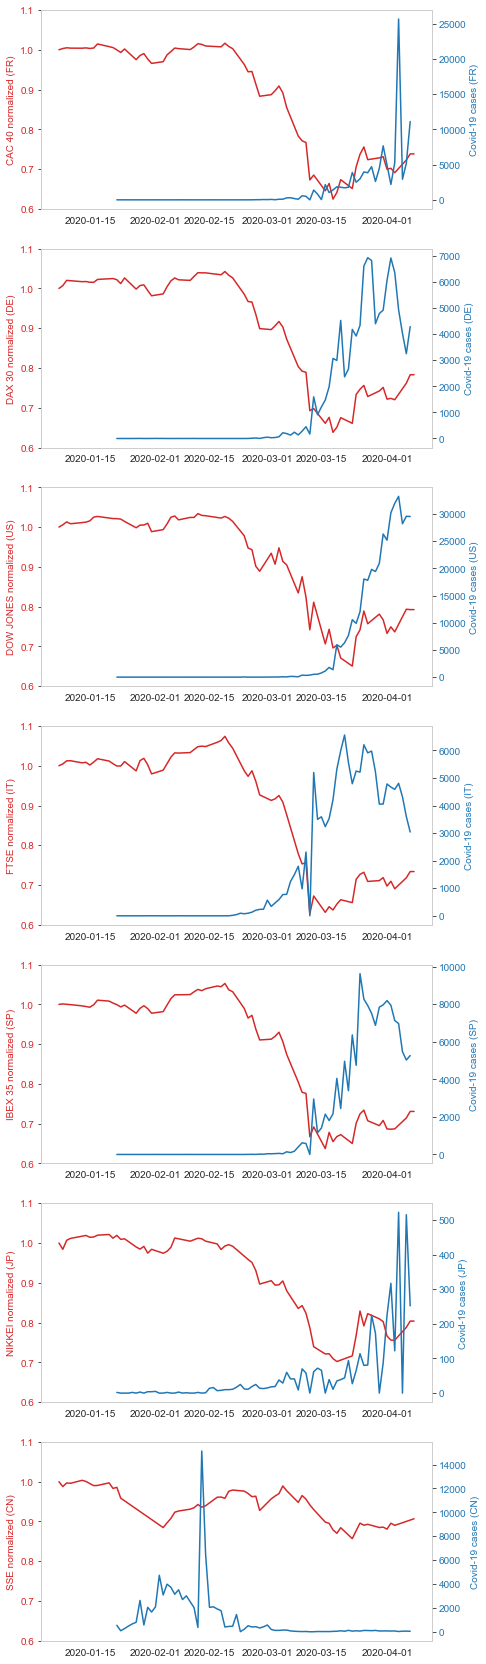

In [16]:
#  Dual Plotting: Stock market index & new cases of Covid-19 over time (All)
fig, axes = plt.subplots(nrows=7,
                         ncols=1,
                         figsize=(7,30))

# Creating 2 lists for the stock market indexes and the covid-19 cases respectively to iterate through the loop to create the plots.
y1_stockmarket_list = ["CAC 40 normalized (FR)","DAX 30 normalized (DE)", "DOW JONES normalized (US)","FTSE normalized (IT)", "IBEX 35 normalized (SP)","NIKKEI normalized (JP)","SSE normalized (CN)"]
y2_covid19_list = ["Covid-19 cases (FR)", "Covid-19 cases (DE)", "Covid-19 cases (US)", "Covid-19 cases (IT)", "Covid-19 cases (SP)", "Covid-19 cases (JP)", "Covid-19 cases (CN)"]

for i in range(7): 
    x_values = df['date'] # x-axis: dates
    y1_values = df[y1_stockmarket_list[i]] # y1-axis: stock market index values normalized to the 1st available value for 2020
    y2_values = df[y2_covid19_list[i]] # y2-axis: new cases of covid-19 confirmed daily
    color = 'tab:red'
    axes[i].set_ylabel(y1_stockmarket_list[i], color=color)
    axes[i].plot(x_values, y1_values, color=color) # plotting stock market index over time
    axes[i].tick_params(axis='y', labelcolor=color)
    axes[i].grid(b=None)
    axes[i].set_ylim(bottom=0.6, top=1.1) # using the same scale for all countries for the sake of comparison
    axes[i] = axes[i].twinx()  # using the same x-axis (i.e. dates) to plot the number of new confirmed cases of covid-19
    color = 'tab:blue'
    axes[i].set_ylabel(y2_covid19_list[i], color=color)  
    axes[i].plot(x_values, y2_values, color=color) # plotting number of new cases of covid-19 confirmed daily over time
    axes[i].tick_params(axis='y', labelcolor=color)
    axes[i].grid(b=None)

plt.show()